## 결정 트리

In [8]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
iris_data = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target)

In [6]:
dtc = DecisionTreeClassifier()
# DecisionTreeClassifier 학습
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

 ### Setting - MAC
 1. brew install graphviz
 2. (Conda or Main) pip install graphviz

In [9]:
export_graphviz(dtc, out_file="tree.dot", class_names=iris_data.target_names, feature_names= iris_data.feature_names, impurity=True, filled=True)

In [10]:
import graphviz


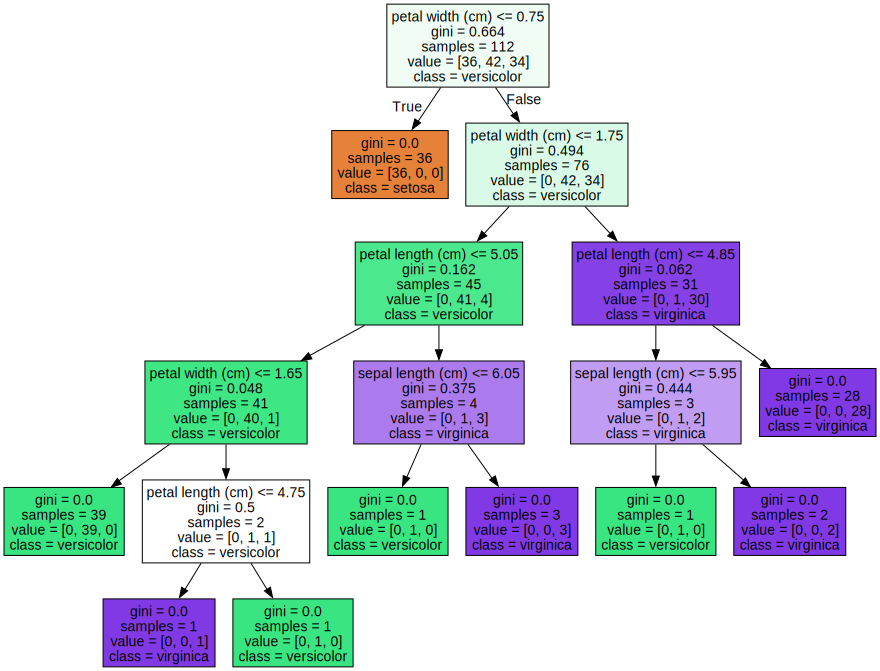

In [11]:
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### 트리 설명
1. samples: 전체 데이터 개수
2. value: 데이터 구성 / [36, 42, 34]는 Setosa 36개, Versicolor 42개, Virginica 34개로 구성됨을 의미
3. sample 112개가 value = [36, 42, 34] 분포도로 되어 있으므로 지니 계수는 0.664
4. petal length (cm) <= 0.75 규칙으로 자식 노드 생성
5. class = Versicolor는 하위 노드를 가질 경우에 Versicolor의 개수가 42개로 가장 많다는 것을 의미

### max_depth

In [12]:
export_graphviz(dtc, out_file="max_depth.dot", class_names=iris_data.target_names, 
                feature_names= iris_data.feature_names, impurity=True, filled=True, max_depth=3)

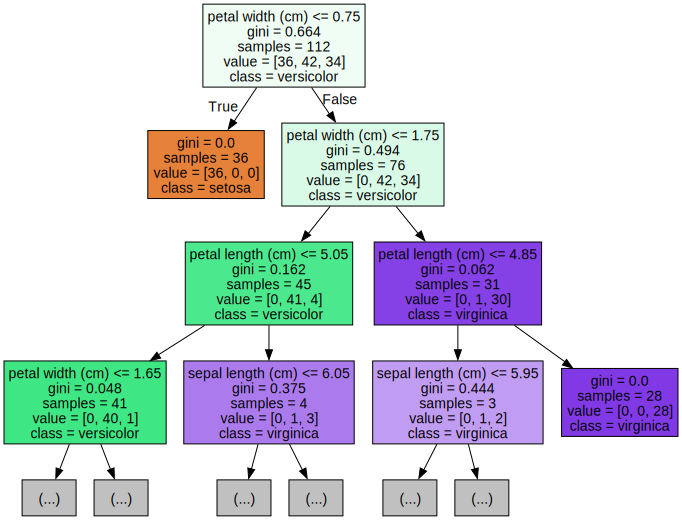

In [13]:
with open("max_depth.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)